# MNIST Basic Approach (Softmax)

In [1]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# IMport tensorflow
import tensorflow as tf

C:\Users\anil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Getting MNIST data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Play with MNIST data

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.train.labels.shape

(55000, 10)

In [7]:
single_image = mnist.train.images[1].reshape(28, 28)

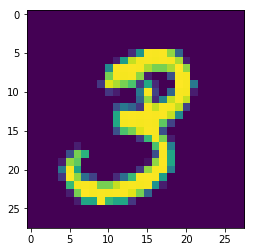

In [8]:
plt.imshow(single_image)

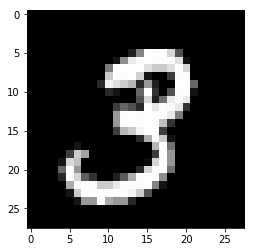

In [10]:
# gray scale representation
plt.imshow(single_image, cmap = 'gist_gray')

Define Variables

In [12]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Define Placeholders

In [13]:
X_ph = tf.placeholder(dtype=tf.float32, shape=[None, 784])
y_ph = tf.placeholder(dtype=tf.float32, shape=[None, 10])

Define Computing Graph

In [14]:
y_hat = tf.matmul(X_ph, W) + b

Define Loss function

In [15]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_ph, logits=y_hat))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Define optimizer

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [21]:
train = optimizer.minimize(cross_entropy)

Initiallize global_variable_initializer

In [22]:
init = tf.global_variables_initializer()

Create Session

In [23]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        # mnist have function for batch
        batch_x, batch_y = mnist.train.next_batch(batch_size=100)
        
        sess.run(train, feed_dict = {X_ph : batch_x, y_ph : batch_y})
        
    # Evaluate 
    correct_predictions = tf.equal(tf.arg_max(y_ph, 1), tf.arg_max(y_hat, 1))
    
    # binary and avarage
    acc = tf.reduce_mean(tf.cast(correct_predictions, dtype=tf.float32))
    
    # print
    print(sess.run(acc, feed_dict = {X_ph : mnist.test.images, y_ph : mnist.test.labels}))

0.9082
